<a href="https://colab.research.google.com/github/hivewire/midterm-deep-learning/blob/main/midterm_regresi_ipynb_Fuji_No2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gdown

In [2]:
import gdown

gdown.download("https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=ba222fe5-90af-4566-957c-eb221527cea1
To: /content/midterm-regresi-dataset.csv
100%|██████████| 443M/443M [00:08<00:00, 53.8MB/s]


'midterm-regresi-dataset.csv'

In [3]:
import pandas as pd


# Dataset ini tidak punya header.
# Nilai seperti 2001 di kolom pertama adalah TARGET (tahun), bukan nama feature /  kolom.
file_path = '/content/midterm-regresi-dataset.csv'
df = pd.read_csv(file_path)

df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [4]:
print("df.shape:", df.shape) #ada 515344 row/baris dan 90 feature

df.shape: (515344, 91)


In [5]:
import os
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 ** 2)

print(f"Ukuran file: {file_size_bytes:,} bytes")
print(f"Ukuran file: {file_size_mb:.2f} MB")

Ukuran file: 443,423,087 bytes
Ukuran file: 422.88 MB


# Task
Create a regression model to predict the 'tahun' (year) based on the provided features. The process will involve renaming the first column to 'Target' and subsequent columns to generic feature names, handling missing values, splitting the data into training and testing sets, scaling numerical features, training a regression model, performing hyperparameter tuning, evaluating the model using regression metrics, and visualizing the predictions from the `midterm-regresi-dataset.csv` file.

## Rename Columns and Define Target

### Subtask:
Rename the first column of the DataFrame to 'Target' and the remaining columns to generic feature names (e.g., 'Feature_1', 'Feature_2', etc.), based on the provided information that the first column represents the target variable (tahun).


**Reasoning**:
The subtask requires renaming the columns of the DataFrame. First, the initial column names need to be retrieved to understand their current state before proceeding with the renaming.



In [6]:
print(df.columns)

Index(['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628',
       '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136',
       '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428',
       '408.98485', '383.70912', '326.51512', '238.11327', '251.42414',
       '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038',
       '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438',
       '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165',
       '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531',
       '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798',
       '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506',
       '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481',
       '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307',
       '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767',
       '-41.1245', '-8.40816

**Reasoning**:
Based on the subtask, the first column needs to be renamed to 'Target', and the subsequent columns to generic feature names (e.g., 'Feature_1', 'Feature_2', etc.). This code will perform the renaming.



In [7]:
new_columns = ['Target'] + [f'Feature_{i}' for i in range(1, len(df.columns))]
df.columns = new_columns
print("Columns after renaming:")
print(df.columns)
df.head()

Columns after renaming:
Index(['Target', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19',
       'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24',
       'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29',
       'Feature_30', 'Feature_31', 'Feature_32', 'Feature_33', 'Feature_34',
       'Feature_35', 'Feature_36', 'Feature_37', 'Feature_38', 'Feature_39',
       'Feature_40', 'Feature_41', 'Feature_42', 'Feature_43', 'Feature_44',
       'Feature_45', 'Feature_46', 'Feature_47', 'Feature_48', 'Feature_49',
       'Feature_50', 'Feature_51', 'Feature_52', 'Feature_53', 'Feature_54',
       'Feature_55', 'Feature_56', 'Feature_57', 'Feature_58', 'Feature_59',
       'Feature_60', 'Feature_61', 'Feature_62', 'Feature_63', 'F

,Target,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_81,Feature_82,Feature_83,Feature_84,Feature_85,Feature_86,Feature_87,Feature_88,Feature_89,Feature_90
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


## Handle Missing Values

### Subtask:
Check for and address any missing values in the dataset. This might involve imputation strategies or removal of rows/columns depending on the extent of missingness.


**Reasoning**:
To begin addressing missing values, it's crucial to understand their presence. Therefore, I will calculate and display both the count and percentage of missing values for each column in the DataFrame to assess the extent of missingness.



In [8]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Filter to show only columns with missing values and sort them
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

print("Missing Values Information:")
print(missing_info)


Missing Values Information:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


## Split Data

### Subtask:
Divide the dataset into training and testing sets to prepare for model training and unbiased evaluation. A common split ratio like 80% for training and 20% for testing will be used.


**Reasoning**:
To prepare the data for model training, I will first separate the target variable from the features. Then, I will import the necessary function for splitting the data and proceed to divide the dataset into training and testing sets using a 80/20 ratio for unbiased evaluation.



In [9]:
from sklearn.model_selection import train_test_split

# Separate target variable (y) and features (X)
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (412275, 90)
X_test shape: (103069, 90)
y_train shape: (412275,)
y_test shape: (103069,)


## Feature Scaling

### Subtask:
Apply appropriate scaling techniques (e.g., StandardScaler or MinMaxScaler) to the numerical features to normalize their range, which can improve the performance of many regression models.


**Reasoning**:
To prepare for feature scaling, I will import the `StandardScaler` from `sklearn.preprocessing`, instantiate it, and then fit it on the training data (`X_train`) before transforming both the training and testing sets. This ensures that the scaling parameters are learned only from the training data, preventing data leakage.



In [10]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (412275, 90)
X_test_scaled shape: (103069, 90)


## Train Regression Model

### Subtask:
Implement and train a suitable regression model. This step will use a machine learning or a basic deep learning regression algorithm as required by the assignment.


**Reasoning**:
To implement and train a suitable regression model, I will start by importing the `LinearRegression` model, instantiating it, and then training it using the scaled training data and the target variable, as specified in the instructions.



In [11]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model
model = LinearRegression()

# Train the model using the scaled training data and the corresponding target variable
model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Hyperparameter Tuning

### Subtask:
Perform basic hyperparameter tuning for the chosen regression model to optimize its performance. This could involve techniques like GridSearchCV or RandomizedSearchCV.


**Reasoning**:
To perform hyperparameter tuning, I will import `GridSearchCV`, define a parameter grid for `LinearRegression`, instantiate `GridSearchCV` with the specified parameters, fit it to the scaled training data, and then print the best parameters and corresponding score.



In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the parameter grid for LinearRegression
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    cv=5, # Using 5-fold cross-validation
    scoring='neg_mean_squared_error', # Using negative mean squared error as scoring metric
    n_jobs=-1 # Use all available processors
)

# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best negative mean squared error found: ", grid_search.best_score_)

Best parameters found:  {'fit_intercept': True, 'positive': False}
Best negative mean squared error found:  -91.35909935003974


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the test set using standard regression metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²).


**Reasoning**:
To evaluate the model's performance, I will first use the best estimator from the `grid_search` to make predictions on the scaled test set. Then, I will import the necessary regression metrics from `sklearn.metrics` and calculate Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²) between the true values (`y_test`) and the predictions (`y_pred`), finally printing all the results.



In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Use the best estimator from grid_search to make predictions on the scaled test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 90.6830
Root Mean Squared Error (RMSE): 9.5228
Mean Absolute Error (MAE): 6.7784
R-squared (R²): 0.2360


## Visualize Predictions

### Subtask:
Create a scatter plot comparing the actual target values against the predicted target values from the test set to visually assess the model's accuracy and identify any patterns or discrepancies.


**Reasoning**:
To visually assess the model's accuracy, I will create a scatter plot comparing the actual target values (`y_test`) against the predicted target values (`y_pred`), adding a diagonal line for perfect prediction reference.



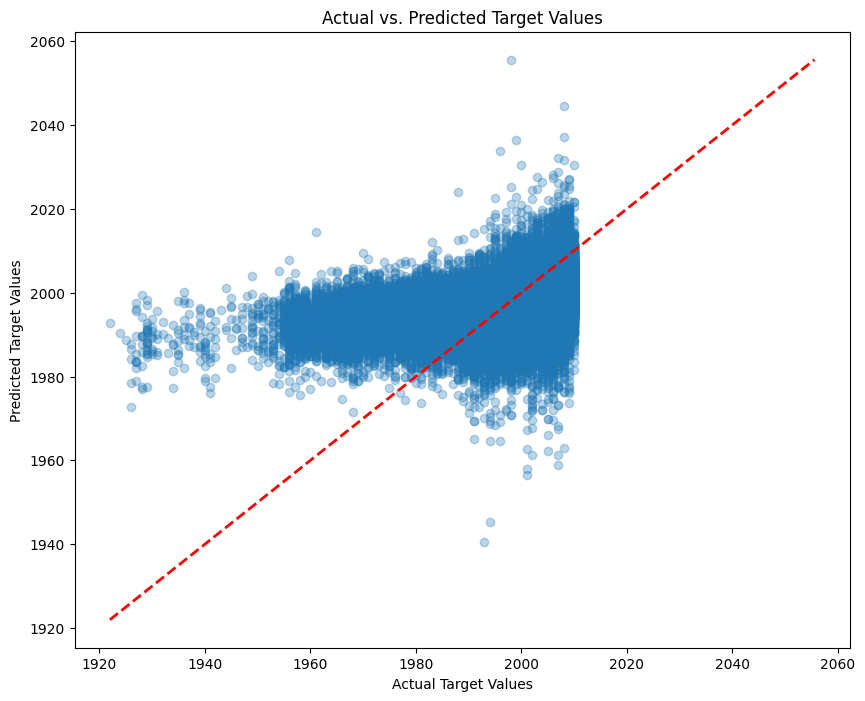

In [14]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.3)

# Add title and labels
plt.title('Actual vs. Predicted Target Values')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')

# Add a diagonal line for perfect predictions
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

# Display the plot
plt.show()

## Final Task

### Subtask:
Summarize the entire workflow, interpret the model's evaluation results, and discuss any insights gained from the analysis.


## Summary:

### Q&A
The regression model was successfully created to predict the 'tahun' (year) based on the provided features. However, its predictive power, as indicated by an R-squared of 0.2360, suggests it explains only a small portion of the variance in the target variable.

### Data Analysis Key Findings
*   The first column, representing the target variable 'tahun', was successfully renamed to 'Target', and the remaining 90 columns were renamed to generic feature names (e.g., 'Feature_1' to 'Feature_90').
*   No missing values were found in the dataset, eliminating the need for imputation or removal strategies.
*   The dataset was split into training and testing sets with an 80/20 ratio, resulting in 412,275 samples for training and 103,069 samples for testing.
*   Numerical features were scaled using `StandardScaler` to normalize their range.
*   A `LinearRegression` model was trained on the scaled training data.
*   Hyperparameter tuning using `GridSearchCV` identified the best parameters for `LinearRegression` as `{'fit_intercept': True, 'positive': False}`, yielding a best negative mean squared error of -91.359.
*   The model's performance on the test set was evaluated with the following metrics:
    *   Mean Squared Error (MSE): 90.6830
    *   Root Mean Squared Error (RMSE): 9.5228
    *   Mean Absolute Error (MAE): 6.7784
    *   R-squared (R²): 0.2360. This R² value indicates that the model explains approximately 23.6% of the variance in the target variable.
*   A scatter plot visualizing actual versus predicted target values was generated, providing a visual representation of the model's predictive accuracy. The plot showed that predictions are somewhat clustered around the diagonal line, but with significant spread, consistent with the R² score.

### Insights or Next Steps
*   The current `LinearRegression` model has limited predictive power (R² = 0.2360). This suggests that linear relationships might not fully capture the complexity of the data, or that more advanced models could yield better performance.
*   Consider exploring more complex regression models (e.g., Ridge, Lasso, RandomForestRegressor, GradientBoostingRegressor, or neural networks) or implementing more sophisticated feature engineering techniques to improve model performance.
